# Mat 381E: Introduction to Data Science Final Project
## Analysis with Expected Goals
Team Members  
1.Engin Pehlivan 090200769  
2.Ozan Yeşil 090190325  
3.Alp Doğan Fidan 090180320

# Analyzing Goals

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from urllib.request import urlopen
import datetime as dt
from xmltodict import parse
from urllib.request import urlopen
import pandas as pd
import numpy as np
from collections import Counter
import random


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [100]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing, Merging and Cleaning Main Data from Kaggle

In [101]:
import os
os.environ['KAGGLE_USERNAME'] = "fialdoist"
os.environ['KAGGLE_KEY'] = "dcd423af7eb87ba500354f2ad1c4b3fb"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

#The Content List of Football Events from Kaggle
#api.dataset_list_files('secareanualin/football-events').files

# First Way to Download
api.dataset_download_files('secareanualin/football-events', path='.\\football-events',unzip=True)
api.dataset_download_files('stefanoleone992/fifa-20-complete-player-dataset', path='.\\fifa-20-complete-player-dataset', unzip=True)


In [102]:
data = pd.read_csv('football-events/events.csv')
ginf = pd.read_csv('football-events/ginf.csv')

In [103]:
data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


In [104]:
ginf

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86


In [105]:
data = data.merge(ginf[['id_odsp', 'country', 'date']], on='id_odsp',  how = 'left')
data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22


In [106]:
data['year'] = pd.DatetimeIndex(data['date']).year
data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2011
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22,2017
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22,2017
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22,2017
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22,2017


In [107]:
shots= data[data['event_type']==1]
shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2011
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,shinji kagawa,mario gotze,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0,germany,2011-08-05,2011
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,germany,2011-08-05,2011
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,mats hummels,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,germany,2011-08-05,2011
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,tomas rincon,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,germany,2011-08-05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,remo freuler,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,italy,2017-01-22,2017
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,alberto grassi,remo freuler,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0,italy,2017-01-22,2017
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,alejandro gomez,andrea petagna,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0,italy,2017-01-22,2017
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,luis muriel,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0,italy,2017-01-22,2017


In [108]:
loca=shots[shots['is_goal']==1][['location','is_goal']]

loca.loc[loca['location'] == 1, 'location'] = "Attacking half"
loca.loc[loca['location'] == 2, 'location'] = "Defensive half"
loca.loc[loca['location'] == 3, 'location'] = "Centre of the box"
loca.loc[loca['location'] == 4, 'location'] = "Left wing"
loca.loc[loca['location'] == 5, 'location'] = "Right wing"
loca.loc[loca['location'] == 6, 'location'] = "Difficult angle and long range"
loca.loc[loca['location'] == 7, 'location'] = "Difficult angle on the left"
loca.loc[loca['location'] == 8, 'location'] = "Difficult angle on the right"
loca.loc[loca['location'] == 9, 'location'] = "Left side of the box"
loca.loc[loca['location'] == 10, 'location'] = "Left side of the six yard box"
loca.loc[loca['location'] == 11, 'location'] = "Right side of the box"
loca.loc[loca['location'] == 12, 'location'] = "Right side of the six yard box"
loca.loc[loca['location'] == 13, 'location'] = "Very close range"
loca.loc[loca['location'] == 14, 'location'] = "Penalty spot"
loca.loc[loca['location'] == 15, 'location'] = "Outside the box"
loca.loc[loca['location'] == 16, 'location'] = "Long range"
loca.loc[loca['location'] == 17, 'location'] = "More than 35 yards"
loca.loc[loca['location'] == 18, 'location'] = "More than 40 yards"
loca.loc[loca['location'] == 19, 'location'] = "Not recorded"
loca

,location,is_goal
13,Left side of the box,1
26,Centre of the box,1
50,Very close range,1
92,Centre of the box,1
175,Outside the box,1
...,...,...
940713,Centre of the box,1
940716,Left side of the box,1
940722,Left side of the box,1
940742,Right side of the box,1


In [109]:
percentage = []
total=loca['is_goal'].sum()
loca=loca.groupby('location').sum().reset_index()
 
for i in range(loca.shape[0]):
    pct = (loca.is_goal[i]/total) * 100
    percentage.append(round(pct, 2))
    
percentage
loca['percentage']=percentage
loca=loca.sort_values(by=['percentage'],ascending=False)
loca

,location,is_goal,percentage
0,Centre of the box,10713,43.83
14,Very close range,3337,13.65
10,Outside the box,2555,10.45
11,Penalty spot,1989,8.14
9,Not recorded,1438,5.88
12,Right side of the box,1273,5.21
4,Left side of the box,1234,5.05
5,Left side of the six yard box,711,2.91
13,Right side of the six yard box,702,2.87
2,Difficult angle on the left,201,0.82


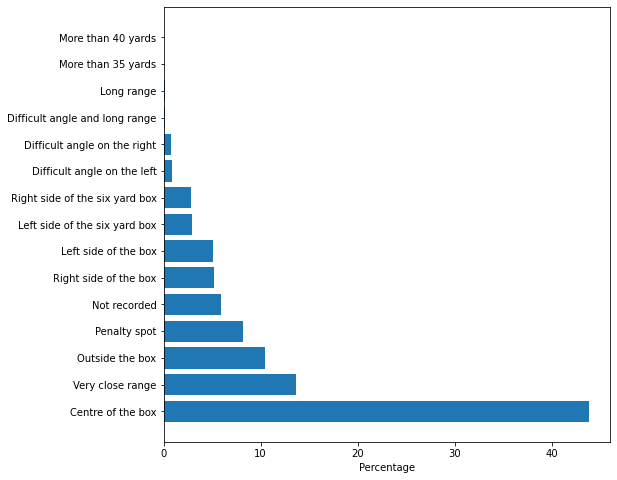

In [110]:
plt.figure(figsize=(8,8))
plt.barh(loca.location,loca.percentage)
plt.xlabel('Percentage')
plt.show()

From our visualizations we can see that most of the goals are scored from the center and from  relatively close distance (box). 

In [111]:
sit=shots[shots['is_goal']==1][['situation','is_goal']]

sit.loc[sit["situation"] == 1, 'situation'] = "Open play"
sit.loc[sit["situation"] == 2, 'situation'] = "Set piece"
sit.loc[sit["situation"] == 3, 'situation'] = "Corner"
sit.loc[sit["situation"] == 4, 'situation'] = "Free kick"
sit

,situation,is_goal
13,Open play,1
26,Open play,1
50,Corner,1
92,Corner,1
175,Open play,1
...,...,...
940713,Open play,1
940716,Open play,1
940722,Open play,1
940742,Open play,1


In [112]:
def grafik(shots,situation):
    
    data=shots.groupby(situation).sum().reset_index()
    labels = data[situation]
    values = data['is_goal']
    plt.pie(values, labels=labels,autopct='%1.1f%%')
    plt.show()

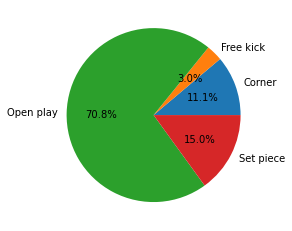

In [113]:
grafik(sit,'situation')

In [114]:
body=shots[shots['is_goal']==1][['bodypart','is_goal']]

body.loc[body["bodypart"] == 1, 'bodypart'] = "right foot"
body.loc[body["bodypart"] == 2, 'bodypart'] = "left foot"
body.loc[body["bodypart"] == 3, 'bodypart'] = "head"
body

,bodypart,is_goal
13,left foot,1
26,right foot,1
50,right foot,1
92,left foot,1
175,right foot,1
...,...,...
940713,left foot,1
940716,left foot,1
940722,right foot,1
940742,right foot,1


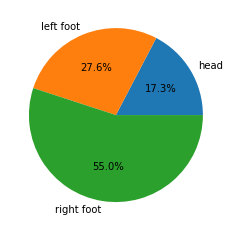

In [115]:
grafik(body,'bodypart')

# Calculating points for every year for every team

In [116]:
def puan_tablo(data,country,year):
    
    data=data[data['season']==year].reset_index()
    data=data[data['country']==country].reset_index()
    dica={}
    for i in range(len(data[data['country']==country])):
           
        if data.iloc[i]['fthg']>data.iloc[i]['ftag']:
            
            if data.iloc[i]['ht'] in dica.keys():
                
                dica[data.iloc[i]['ht']]=dica[data.iloc[i]['ht']]+3
            else:
                dica[data.iloc[i]['ht']]=3
        elif data.iloc[i]['fthg']<data.iloc[i]['ftag']:
            if data.iloc[i]['at'] in dica.keys():
                
                dica[data.iloc[i]['at']]=dica[data.iloc[i]['at']]+3
            else:
                dica[data.iloc[i]['at']]=3
    
        elif data.iloc[i]['fthg']==data.iloc[i]['ftag']:
            if data.iloc[i]['ht'] in dica.keys():
                
                dica[data.iloc[i]['ht']]=dica[data.iloc[i]['ht']]+3
            else:
                dica[data.iloc[i]['ht']]=1
        
            if data.iloc[i]['at'] in dica.keys():
                
                dica[data.iloc[i]['at']]=dica[data.iloc[i]['at']]+3
            else:
                dica[data.iloc[i]['at']]=1
    dica = sorted([(value, key) for (key, value) in dica.items()],reverse=True)
    
    return dica

In [117]:
ger =puan_tablo(ginf,'germany',2012)
ger

[(93, 'Borussia Dortmund'),
 (81, 'Bayern Munich'),
 (78, 'Borussia Monchengladbach'),
 (72, 'Schalke 04'),
 (72, 'Hannover 96'),
 (72, 'Bayer Leverkusen'),
 (69, 'VfB Stuttgart'),
 (64, 'FC Augsburg'),
 (63, 'TSG Hoffenheim'),
 (63, 'Mainz'),
 (60, 'Werder Bremen'),
 (58, 'SC Freiburg'),
 (58, 'Hamburg SV'),
 (54, 'VfL Wolfsburg'),
 (54, 'Nurnberg'),
 (49, 'Hertha Berlin'),
 (43, 'Kaiserslautern'),
 (40, 'FC Cologne')]

# Calculating team goals based on location

In [118]:
def team_goal(events,team,year):
    team=events[events['event_team']==team]
    team=team[team['year']==year].reset_index()
    
    team_shot=team[team['event_type']==1][['location','is_goal']].reset_index()
    dene=team_shot.drop('index',axis=1)
    
    dene.loc[dene["location"] == 1,'location'] = "Attacking half"
    dene.loc[dene["location"] == 2,'location'] = "Defensive half"
    dene.loc[dene["location"] == 3,'location'] = "Centre of the box"
    dene.loc[dene["location"] == 6,'location'] = "Difficult angle and long range"
    dene.loc[dene["location"] == 7,'location'] = "Difficult angle on the left"
    dene.loc[dene["location"] == 8,'location'] = "Difficult angle on the right"
    dene.loc[dene["location"] == 9,'location'] = "Left side of the box"
    dene.loc[dene["location"] == 10,'location'] = "Left side of the six yard box"
    dene.loc[dene["location"] == 11,'location'] = "Left side of the six yard box"
    dene.loc[dene["location"] == 12,'location'] = "Right side of the box"
    dene.loc[dene["location"] == 13,'location'] = "Right side of the six yard box"
    dene.loc[dene["location"] == 14,'location'] = "Very close range"
    dene.loc[dene["location"] == 15,'location'] = "Penalty spot"
    dene.loc[dene["location"] == 16,'location'] = "Long range"
    dene.loc[dene["location"] == 17,'location'] = "More than 35 yards"
    dene.loc[dene["location"] == 18,'location'] = "More than 40 yards"
    dene.loc[dene["location"] == 19,'location'] = "Not recorded"
    
    dene=dene.groupby('location').sum().reset_index()
    dene=dene[dene['is_goal']>1]
    
    labels = dene['location']
    values = dene['is_goal']
    plt.pie(values, labels=labels,autopct='%1.0f%%')
    plt.show()

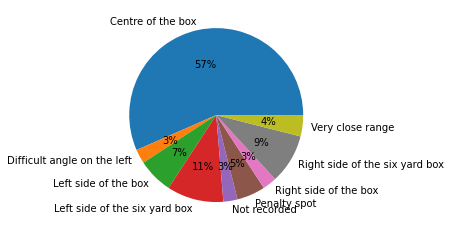

In [119]:
team_goal(data,'Borussia Dortmund',2012)

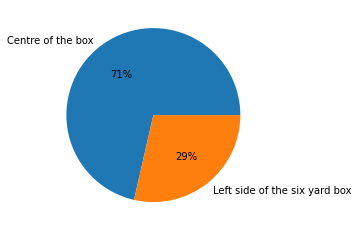

In [120]:
team_goal(data,'FC Cologne',2012)

# Expected Goal
We calcualted the goal expentancy for each team for every single year. Function returns the number of goals scored and the xG value and dfiference between them. If the difference is positive, then that team has scored more goals than expected based on our model.

In [121]:
def xg_team(shots,team,year):
    
    data = pd.get_dummies(shots[['location','bodypart','situation']], columns=['location', 'bodypart','situation'])
    data['is_goal'] = shots['is_goal']
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    shots['xg'] = model.predict_proba(X)[:, 1]
    shots['diff']=shots['is_goal']-shots['xg']

    
    takim=shots[shots['year']==year]
    takim=takim.groupby('event_team').sum().reset_index()
    takim.rename(columns = {'is_goal':'goals'}, inplace = True)
    return takim[takim['event_team']==team][['goals','xg','diff']]

In [122]:
xg_team(shots,'FC Cologne',2012)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-121-e95a914d3561>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['xg'] = model.predict_proba(X)[:, 1]
<ipython-input-121-e95a914d3561>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,goals,xg,diff
29,12,15.952662,-3.952662


In [123]:
a=puan_tablo(ginf,'germany',2016)
a

[(96, 'Bayern Munich'),
 (90, 'Borussia Dortmund'),
 (72, 'Bayer Leverkusen'),
 (69, 'FC Cologne'),
 (66, 'Schalke 04'),
 (66, 'Mainz'),
 (66, 'Hertha Berlin'),
 (63, 'VfL Wolfsburg'),
 (63, 'Borussia Monchengladbach'),
 (60, 'FC Ingolstadt 04'),
 (58, 'SV Darmstadt 98'),
 (58, 'FC Augsburg'),
 (58, 'Eintracht Frankfurt'),
 (57, 'Hamburg SV'),
 (55, 'TSG Hoffenheim'),
 (52, 'Werder Bremen'),
 (45, 'VfB Stuttgart'),
 (31, 'Hannover 96'),
 (1, 'Nurnberg')]

In [124]:
y = puan_tablo(ginf, 'spain',2016)

In [125]:
z = puan_tablo(ginf,'england', 2016)
z

[(105, 'Leicester City'),
 (94, 'Tottenham'),
 (93, 'Arsenal'),
 (90, 'West Ham'),
 (84, 'Manchester Utd'),
 (84, 'Manchester City'),
 (84, 'Liverpool'),
 (79, 'Southampton'),
 (76, 'Chelsea'),
 (73, 'Everton'),
 (67, 'West Brom'),
 (67, 'Swansea'),
 (67, 'Stoke City'),
 (61, 'Watford'),
 (61, 'Sunderland'),
 (60, 'Crystal Palace'),
 (60, 'Bournemouth'),
 (55, 'Newcastle'),
 (48, 'Norwich City'),
 (33, 'Aston Villa')]

In [126]:
t = puan_tablo(ginf,'italy', 2016)
t

[(100, 'AS Roma'),
 (97, 'Juventus'),
 (94, 'Napoli'),
 (87, 'Sassuolo'),
 (84, 'Fiorentina'),
 (81, 'Internazionale'),
 (81, 'AC Milan'),
 (72, 'Lazio'),
 (72, 'Chievo Verona'),
 (69, 'Atalanta'),
 (64, 'Empoli'),
 (63, 'Torino'),
 (60, 'Sampdoria'),
 (60, 'Genoa'),
 (60, 'Bologna'),
 (58, 'Carpi'),
 (57, 'Udinese'),
 (57, 'Palermo'),
 (52, 'Hellas Verona'),
 (43, 'Frosinone')]

In [127]:
v = puan_tablo(ginf,'france', 2016)
v

[(108, 'Paris Saint-Germain'),
 (93, 'AS Monaco'),
 (88, 'Lille'),
 (84, 'Marseille'),
 (79, 'Nice'),
 (79, 'Lyon'),
 (78, 'Stade Rennes'),
 (76, 'Bordeaux'),
 (72, 'Nantes'),
 (72, 'Angers'),
 (70, 'St Etienne'),
 (70, 'Lorient'),
 (66, 'Toulouse'),
 (66, 'Guingamp'),
 (66, 'Caen'),
 (66, 'Bastia'),
 (61, 'Montpellier'),
 (61, 'GFC Ajaccio'),
 (57, 'Stade de Reims'),
 (34, 'Troyes')]

# Summary XG of a Random Match In The Season

## Data Filtering

In [128]:
def setDataSeason(data,season):
        if len(season) > 1 :
            data = data.loc[(season[0] <= data['year']) & (data['year'] <=season[1])]
            print("Date was chosen as " + str(season[0]) +" - "+ str(season[1]) + ".")
        elif len(season) == 1 :
            data = data.loc[data['year'] == season[0]]
            print("Date was chosen as " + str(season[0]) + ".")
        else :
            print("Date is invalid.")
                
        return data

In [129]:
def setDataCountry(data,country):
        if country in pd.unique(data['country']):
            data = data.loc[data['country']==country]
            print("Country(League) was chosen as " + country.upper() + ".")
        else :
            print("Country(League) is invalid.")
        return data

In [130]:
def setDataTeam(data,team):
        if team in pd.unique(data['event_team']):
            data = data.loc[(data['event_team']==team)] #|(data['opponent']==team)]
            print("Team was chosen as " + team.upper() + ".")
        else :
            print("Team is invalid.")
        return data

In [131]:
def filterData(data,season = None,country = None,team = None):
    if season is not None:
        data = setDataSeason(data,season)
    else:
        print('Season is not chosen.')
    
    if country is not None:
        data = setDataCountry(data,country)
    else:
        print('Country is not chosen.')
        
    if team is not None:
        data = setDataTeam(data,team)
    else:
        print('Team is not chosen.')
    
    return data

## Shots

In [132]:
shots = data[data.event_type==1]

In [133]:
def xg_team(shots):
    
    data = pd.get_dummies(shots[['location','bodypart','situation']], columns=['location', 'bodypart','situation'])
    data['is_goal'] = shots['is_goal']
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    shots['xg'] = model.predict_proba(X)[:, 1]
    shots['xg'] = round(shots['xg'],2)
    return shots

In [134]:
shots = xg_team(shots)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-133-91562aab547b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['xg'] = model.predict_proba(X)[:, 1]
<ipython-input-133-91562aab547b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [135]:
def replaceData(data):
    data = data
    data['shot_outcome'].replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'}, inplace=True)
    data['shot_place'].replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'}, inplace=True)
    data['location'].replace({1: 'Attacking half', 2:'Defensive half', 3:'Centre of the box',4:'Left wing',5:'Right wing',\
                        6:'Difficult angle and long range',7:'Difficult angle on the left',8:'Difficult angle on the right',\
                        9:'Left side of the box',10:'Left side of the six yard box',11:'Right side of the box',\
                        12:'Right side of the six yard box',13:'Very close range',14:'Penalty spot',15:'Outside the box',\
                        16:'Long range',17:'More than 35 yards',18:'More than 40 yards',19:'Not recorded'},inplace=True)
    data['bodypart'].replace({1:'Right foot',2:'Left foot',3:'Head'},inplace=True)
    data['side'].replace({1:'Home',2:'Away'},inplace=True)
    
    return data

In [140]:
def matchXG(matchData,xg):
    matchData['xg'] = xg
    matchData = matchData.reset_index(drop=True)
    replaceData(matchData)
    print('Team : '+matchData.at[0,"event_team"])
    print('Opponent : '+matchData.at[0,"opponent"])
    print('Season : '+matchData.at[0,"year"].astype(str))
    print('Date : '+matchData.at[0,"date"])
    print('Side : '+matchData.at[0,"side"])
    print('Total Goal : '+matchData['is_goal'].sum().astype(str))
    print('Total XG : '+ round(matchData['xg'].sum(),2).astype(str))
    print('Total Diff : '+ round(matchData['is_goal'].sum()-matchData['xg'].sum(),2).astype(str))
    matchData = matchData.set_index('time')
    matchData.rename(columns = {'is_goal':'goals'}, inplace = True)
    matchData['goals'].replace({0:'Not Goal',1:'Goal'}, inplace=True)
    
    return matchData[['shot_outcome','shot_place','bodypart','location','goals','xg']]

In [141]:
def seasonXG(seasonData,xg):
    seasonData['xg'] = xg
    seasonData['diff']= round(seasonData['is_goal']-seasonData['xg'],2)
    seasonData = seasonData.rename(columns = {'is_goal':'goals'})
    return seasonData

## By filtering, we get a Season Data and a Random Match Data in the Same Season.

In [142]:
seasonShots = filterData(shots,season=[2015],team = 'Bayern Munich')

randMatch = random.choice(pd.unique(seasonShots['id_odsp']))
matchShots = seasonShots[seasonShots.id_odsp == randMatch]

Date was chosen as 2015.
Country is not chosen.
Team was chosen as BAYERN MUNICH.


### We run the following function to bring the Summary of the Random Match.

In [143]:
matchXG(matchShots,shots['xg'])

Team : Bayern Munich
Opponent : TSG Hoffenheim
Season : 2015
Date : 2015-04-18
Side : Away
Total Goal : 2
Total XG : 2.7
Total Diff : -0.7


<ipython-input-140-b0702a38ddb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchData['xg'] = xg


,shot_outcome,shot_place,bodypart,location,goals,xg
time,,,,,,
7,Blocked,Blocked,Right foot,Outside the box,Not Goal,0.03
7,Off Target,Misses to the right,Right foot,Centre of the box,Not Goal,0.19
9,Blocked,Blocked,Left foot,Outside the box,Not Goal,0.03
17,Off Target,Misses to the left,Right foot,Outside the box,Not Goal,0.04
18,Off Target,Bit too high,Head,Centre of the box,Not Goal,0.09
38,On Target,Bottom left corner,Right foot,Outside the box,Not Goal,0.03
38,On Target,Top right corner,Right foot,Centre of the box,Goal,0.19
48,Hit the Bar,Hits the bar,Right foot,Left side of the box,Not Goal,0.07
49,Blocked,Blocked,Right foot,Outside the box,Not Goal,0.03


### We run the following to get Total Goals - Total XGs of a Team throughout the Season.

In [144]:
seasonXG(seasonShots,shots['xg']).sum()[['goals','xg','diff']]

goals       84
xg       77.82
diff      6.18
dtype: object

### Total Goals and Total XGs of Soccer Players

In [145]:
shots['player'] = shots['player'].astype(str).str.strip()
shots['player2'] = shots['player2'].astype(str).str.strip()

<ipython-input-145-8309510f4128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].astype(str).str.strip()
<ipython-input-145-8309510f4128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].astype(str).str.strip()


### Extracting the Table of Total Goals and Total XGs of the Players

In [146]:
playerData = shots.groupby(['player','year']).sum()[['is_goal','xg']]
playerData['diff'] = playerData['is_goal']-playerData['xg']
playerData = playerData.sort_values(by=['diff'],ascending=False)
playerData = playerData.rename(columns = {'is_goal':'Total Goals', 'xg':'Total XGs'}).reset_index()
playerData

,player,year,Total Goals,Total XGs,diff
0,lionel messi,2012,59,33.56,25.44
1,zlatan ibrahimovic,2016,33,18.70,14.30
2,cristiano ronaldo,2014,34,20.62,13.38
3,luis suarez,2015,30,16.94,13.06
4,luis suarez,2016,34,22.29,11.71
...,...,...,...,...,...
14393,amauri,2013,6,11.27,-5.27
14394,odion ighalo,2016,3,8.51,-5.51
14395,mario balotelli,2014,8,13.79,-5.79
14396,amauri,2014,8,14.54,-6.54


We restrict the data when searching for player name.

### Visualizing the Bar Chart of Total Goals and Total XGs of a Random Player throughout the whole Seasons.

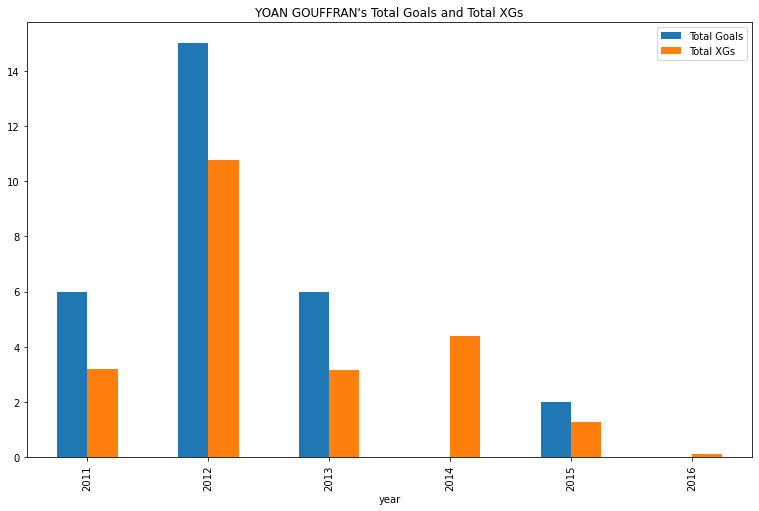

In [148]:
filterPlayer = playerData.loc[playerData['Total Goals']>=10].reset_index()
randomPlayer = random.choice(pd.unique(filterPlayer['player']))

temp = playerData[playerData.player == randomPlayer].sort_values(by=['year'],ascending=True)

temp.plot(x="year", y=["Total Goals", "Total XGs"], kind="bar",title=randomPlayer.upper()+"'s Total Goals and Total XGs", figsize=(13,8))
plt.show()

##  For 5 prominent european league, the following summary clearly shows that playing at away is more difficult than playing at home.

In [149]:
def SummaryAll(events):
    eventsHome = events[events.side == 1]
    eventsAway = events[events.side == 2]
    
    matches = pd.DataFrame( events.groupby('country')['id_odsp'].nunique() )
    matches.columns=['Matches Total']
    
    attemptsHome = eventsHome[eventsHome.event_type == 1]
    XGHome = attemptsHome.groupby('country').sum()
    
    attemptsAway = eventsAway[eventsAway.event_type == 1]
    XGAway = attemptsAway.groupby('country').sum()
    
        
    
    crossHome = pd.crosstab(attemptsHome['country'],attemptsHome['is_goal'])
    crossHome.columns=['Shots not Goal','Shots on Goal']
    crossHome['Total Shots'] = crossHome['Shots not Goal'] + crossHome['Shots on Goal']
    crossHome['Shots Per Match'] = round(crossHome['Total Shots'] / matches['Matches Total'],2)
    crossHome['Goals Per Match'] = round(crossHome['Shots on Goal'] / matches['Matches Total'],2)
    crossHome['XG Per Match'] = round(XGHome['xg'] / matches['Matches Total'],2)

    
    crossAway = pd.crosstab(attemptsAway['country'],attemptsAway['is_goal'])
    crossAway.columns=['Shots not Goal','Shots on Goal']
    crossAway['Total Shots'] = crossAway['Shots not Goal'] + crossAway['Shots on Goal']
    crossAway['Shots Per Match'] = round(crossAway['Total Shots'] / matches['Matches Total'],2)
    crossAway['Goals Per Match'] = round(crossAway['Shots on Goal'] / matches['Matches Total'],2)
    crossAway['XG Per Match'] = round(XGAway['xg'] / matches['Matches Total'],2)
    
    res = matches.join(crossHome).join(crossAway, lsuffix=' HOME', rsuffix=' AWAY')
    return res
    

In [150]:
SummaryAll(shots)

,Matches Total,Shots not Goal HOME,Shots on Goal HOME,Total Shots HOME,Shots Per Match HOME,Goals Per Match HOME,XG Per Match HOME,Shots not Goal AWAY,Shots on Goal AWAY,Total Shots AWAY,Shots Per Match AWAY,Goals Per Match AWAY,XG Per Match AWAY
country,,,,,,,,,,,,,
england,1299,16844,2015,18859,14.52,1.55,1.64,13516,1537,15053,11.59,1.18,1.28
france,2076,24417,3000,27417,13.21,1.45,1.48,19378,2199,21577,10.39,1.06,1.08
germany,1608,20373,2605,22978,14.29,1.62,1.62,16543,2016,18559,11.54,1.25,1.23
italy,2076,26945,3129,30074,14.49,1.51,1.54,22308,2362,24670,11.88,1.14,1.22
spain,2015,24573,3281,27854,13.82,1.63,1.58,19797,2297,22094,10.96,1.14,1.17


In [ ]:
diff_16_germany = []
for i in range(len(a)-1):
    team_name = a[i][1]
    diff_16_germany.append((team_name, xg_team(shots, team_name , 2016)['diff'])) 

In [151]:
diff_16_spain = []
for i in range(len(y)):
    team_name = y[i][1]
    diff_16_spain.append((team_name, xg_team(shots, team_name , 2016)['diff'])) 

In [152]:
diff_16_england = []
for i in range(len(z)):
    team_name = z[i][1]
    diff_16_england.append((team_name, xg_team(shots, team_name , 2016)['diff'])) 

In [153]:
diff_16_italy = []
for i in range(len(t)):
    team_name = t[i][1]
    diff_16_italy.append((team_name, xg_team(shots, team_name , 2016)['diff'])) 

In [154]:
diff_16_france = []
for i in range(len(v)):
    team_name = v[i][1]
    diff_16_france.append((team_name, xg_team(shots, team_name , 2016)['diff'])) 

In [38]:
diff_16_germany

[('Bayern Munich',
  14    8.476567
  Name: diff, dtype: float64),
 ('Borussia Dortmund',
  17    11.916102
  Name: diff, dtype: float64),
 ('Bayer Leverkusen',
  13    3.362551
  Name: diff, dtype: float64),
 ('FC Cologne',
  37   -4.228728
  Name: diff, dtype: float64),
 ('Schalke 04',
  87   -1.732411
  Name: diff, dtype: float64),
 ('Mainz',
  62    4.75853
  Name: diff, dtype: float64),
 ('Hertha Berlin',
  49    2.783271
  Name: diff, dtype: float64),
 ('VfL Wolfsburg',
  106   -11.87821
  Name: diff, dtype: float64),
 ('Borussia Monchengladbach',
  18   -0.52788
  Name: diff, dtype: float64),
 ('FC Ingolstadt 04',
  38   -16.920709
  Name: diff, dtype: float64),
 ('SV Darmstadt 98',
  84   -7.527712
  Name: diff, dtype: float64),
 ('FC Augsburg',
  36   -1.252339
  Name: diff, dtype: float64),
 ('Eintracht Frankfurt',
  32   -1.554962
  Name: diff, dtype: float64),
 ('Hamburg SV',
  46   -4.785589
  Name: diff, dtype: float64),
 ('TSG Hoffenheim',
  97    1.366801
  Name: diff, 

In [39]:
mean_diff_16_germany = sum(float(diff_16_germany[i][1] ) for i in range(len(a)-1)) / len(a)-1
mean_diff_16_germany

-2.28912794302094

In [40]:
mean_diff_16_spain = sum(float(diff_16_spain[i][1]) for i in range(len(y))) / len(y)
mean_diff_16_spain

2.7589035280632457

In [41]:
mean_diff_16_england = sum(float(diff_16_england[i][1]) for i in range(len(z))) / len(z)
mean_diff_16_england

-2.130014265097084

In [42]:
mean_diff_16_italy = sum(float(diff_16_italy[i][1]) for i in range(len(t))) / len(t)
mean_diff_16_italy

-2.865244394762659

In [43]:
mean_diff_16_france = sum(float(diff_16_france[i][1]) for i in range(len(v))) / len(v)
mean_diff_16_france

0.6835871018830793

**So, in this example of 2016 year we see that in some leagues teams scored more goals than expected in average and in some cases it is the opposite. However, in a long term league (~ 38 mathces) scoring 2 goals less or more mighnt not change the position that temas ended up in the end of the seasonn.** 

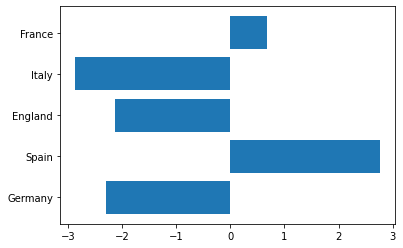

In [44]:
Countries = ['Germany', 'Spain', 'England', 'Italy', 'France']
mean_diffs = [mean_diff_16_germany, mean_diff_16_spain, mean_diff_16_england, mean_diff_16_italy, mean_diff_16_france]
plt.barh(Countries, mean_diffs)
plt.show()

# Let's investigate extra things other than Expected Gaoal

### Adding a new column `League` to compare the leagues

In [45]:
data['League'] = ['Premier League' if x == 'england' else 'Bundesliga' if x == 'germany' else 'La Liga' if x == 'spain' 
                  else 'Serie A' if x == 'italy' else 'League 1' for x in data['country'] ]
data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year,League
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2011,Bundesliga
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011,Bundesliga
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011,Bundesliga
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011,Bundesliga
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2011,Bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22,2017,Serie A
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22,2017,Serie A
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22,2017,Serie A
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22,2017,Serie A


In [46]:
Counter(data['League'])

Counter({'Bundesliga': 174573,
         'League 1': 208446,
         'La Liga': 211943,
         'Serie A': 227127,
         'Premier League': 118920})

Here we calculated number of goals from the column `is_goal` and also number of matches played in that league in order to find the game per goal. After that, visualized with a horizontal bar graph.

In [47]:
laliga = data[data['League'] == 'La Liga']
goal_laliga = sum(laliga['is_goal'])
print(goal_laliga)

match_laliga = Counter(laliga['id_odsp'])
print(len(match_laliga))

5583
2015


In [48]:
premier = data[data['League'] == 'Premier League']
goal_premier = sum(premier['is_goal'])
print(goal_premier)

match_premier = Counter(premier['id_odsp'])
print(len(match_premier))

3552
1299


In [49]:
lig1 = data[data['League'] == 'League 1']
goal_lig1 = sum(lig1['is_goal'])
print(goal_lig1)

match_lig1 = Counter(lig1['id_odsp'])
print(len(match_lig1))

5199
2076


In [50]:
seriea = data[data['League'] == 'Serie A']
goal_seriea = sum(seriea['is_goal'])
print(goal_seriea)

match_seriea = Counter(seriea['id_odsp'])
print(len(match_seriea))

5491
2076


In [51]:
bundesliga = data[data['League'] == 'Bundesliga']
goal_bundesliga = sum(bundesliga['is_goal'])
print(goal_bundesliga)

match_bundesliga = Counter(bundesliga['id_odsp'])
print(len(match_bundesliga))

4621
1608


In [52]:
gpm_laliga = goal_laliga/ len(match_laliga)
gpm_laliga

2.7707196029776675

In [53]:
gpm_premier = goal_premier/ len(match_premier)
gpm_premier

2.7344110854503465

In [54]:
gpm_lig1 = goal_lig1/ len(match_lig1)
gpm_lig1

2.504335260115607

In [55]:
gpm_seriea = goal_seriea/ len(match_seriea)
gpm_seriea

2.644990366088632

In [56]:
gpm_bundesliga = goal_bundesliga/ len(match_bundesliga)
gpm_bundesliga

2.8737562189054726

Bundesliga has more goals per game than ever other top European leagues. Also, every league has the average of at least 2.5 goals per game.

In [57]:
League_names = ['La Liga (Spain)', 'Premier League (England)', 'League 1 (France)', 'Serie A (Italy)', 'Bundesliga (Germany)']
goal_per_matches = [gpm_laliga, gpm_premier, gpm_lig1, gpm_seriea, gpm_bundesliga]

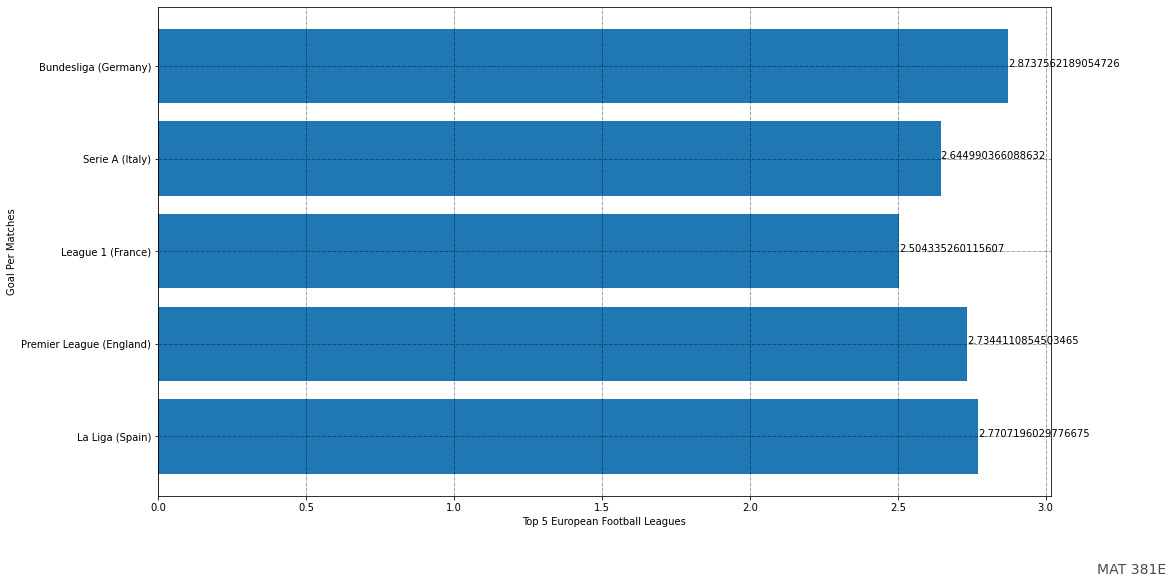

In [58]:
fig, ax = plt.subplots(figsize =(16, 9))

plt.barh(League_names, goal_per_matches)

plt.xlabel("Top 5 European Football Leagues")
plt.ylabel("Goal Per Matches")

ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.75)


fig.text(1.0, 0, 'MAT 381E', fontsize = 14,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.70)

for index, value in enumerate(goal_per_matches):
    plt.text(value, index,
             str(value))
    
plt.show()

In [59]:
data.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2', 'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart', 'assist_method', 'situation', 'fast_break', 'country', 'date', 'year', 'League'], dtype='object')

# Goal Distributons by minutes
Here we extracted the information of minutes of goals scored and visualized in a histogram. In that histogram, one spesific interval is by far the highest which is the minute between 90 and 91st minute and that means most goals are scored within the first minute of the extra time.

In [60]:
goal = data[data['is_goal'] == 1]
goal

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year,League
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,germany,2011-08-05,2011,Bundesliga
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,mario gotze,robert lewandowski,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0,germany,2011-08-05,2011,Bundesliga
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,NaN,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0,germany,2011-08-05,2011,Bundesliga
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,robert tesche,NaN,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0,germany,2011-08-05,2011,Bundesliga
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,papiss demba cisse,felix bastians,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1,germany,2011-08-06,2011,Bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,boschilia,NaN,NaN,NaN,5.0,1.0,1,3.0,2.0,0,1.0,0,france,2017-01-22,2017,League 1
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,boschilia,bernardo silva,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,france,2017-01-22,2017,League 1
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,valere germain,NaN,NaN,NaN,4.0,1.0,1,9.0,1.0,0,1.0,0,france,2017-01-22,2017,League 1
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,valere germain,djibril sidibe,NaN,NaN,5.0,1.0,1,11.0,1.0,1,1.0,0,france,2017-01-22,2017,League 1


In [61]:
goal_time = goal.time
goal_time

13        17
26        29
50        49
92        80
175       48
          ..
940713    24
940716    28
940722    37
940742    59
940948    55
Name: time, Length: 24446, dtype: int64

In [62]:
max(goal_time)

98

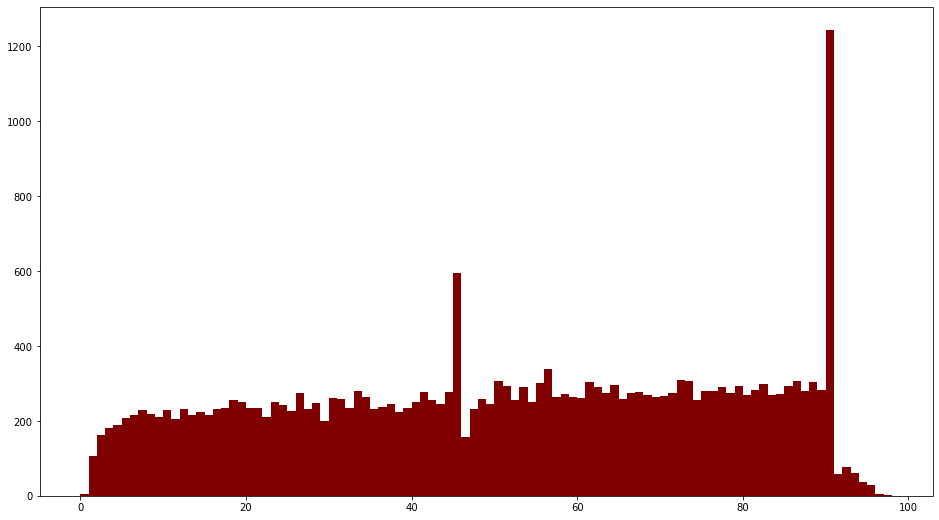

In [63]:
plt.rcParams['figure.figsize'] = 16, 9
x = plt.hist(goal_time, bins = 98, color = 'maroon')
plt.show()

In [64]:
max_goal = max(x[0])
max_goal

1244.0

In [65]:
max_goal_minute = 0
for i in range(len(x[0])):
    if x[0][i] ==  max_goal:
        max_goal_minute = i
max_goal_minute

90

**Most goals are scored between 90 and 91st minute which is the first minute of the extra time. This can be considered as when teams are running out of time they are tend to take more risk and play more offensive.**

In [66]:
x[0] 

array([   6.,  106.,  162.,  182.,  189.,  207.,  217.,  230.,  219.,
        210.,  228.,  205.,  232.,  216.,  224.,  217.,  231.,  235.,
        257.,  250.,  234.,  235.,  210.,  250.,  243.,  227.,  275.,
        233.,  247.,  199.,  260.,  258.,  234.,  280.,  264.,  232.,
        236.,  245.,  224.,  235.,  251.,  278.,  255.,  246.,  276.,
        594.,  158.,  232.,  259.,  245.,  307.,  293.,  256.,  291.,
        250.,  300.,  339.,  264.,  273.,  264.,  262.,  304.,  290.,
        275.,  296.,  259.,  274.,  277.,  270.,  263.,  267.,  275.,
        308.,  306.,  256.,  279.,  281.,  290.,  274.,  294.,  268.,
        283.,  298.,  270.,  271.,  293.,  306.,  281.,  305.,  283.,
       1244.,   59.,   77.,   60.,   38.,   28.,    4.,    3.])

In [67]:
x[1] #99

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98.])

## Home and Away Goals Comparison
Calculated the goals scored by home teams and away teams for each league and then cisualized in a stacked bar chart. It is clearly seen that, home teams scored more goals in every league and the advantage of playing at home seems a real fact. 

In [68]:
laliga_goals = laliga[laliga['is_goal'] == 1]
home_goals_laliga = len(laliga_goals[laliga_goals['side'] == 1])
away_goals_laliga = len(laliga_goals) - home_goals_laliga
print(f"Home goals scored in La Liga is {home_goals_laliga}")
print(f"Away goals scored in La Liga is {away_goals_laliga}")

Home goals scored in La Liga is 3284
Away goals scored in La Liga is 2299


In [69]:
premier_goals = premier[premier['is_goal'] == 1]
home_goals_premier = len(premier_goals[premier_goals['side'] == 1])
away_goals_premier = len(premier_goals) - home_goals_premier
print(f"Home goals scored in La Liga is {home_goals_premier}")
print(f"Away goals scored in La Liga is {away_goals_premier}")

Home goals scored in La Liga is 2015
Away goals scored in La Liga is 1537


In [70]:
lig1_goals = lig1[lig1['is_goal'] == 1]
home_goals_lig1 = len(lig1_goals[lig1_goals['side'] == 1])
away_goals_lig1 = len(lig1_goals) - home_goals_lig1
print(f"Home goals scored in La Liga is {home_goals_lig1}")
print(f"Away goals scored in La Liga is {away_goals_lig1}")

Home goals scored in La Liga is 3000
Away goals scored in La Liga is 2199


In [71]:
seriea_goals = seriea[seriea['is_goal'] == 1]
home_goals_seriea = len(seriea_goals[seriea_goals['side'] == 1])
away_goals_seriea = len(seriea_goals) - home_goals_seriea
print(f"Home goals scored in La Liga is {home_goals_seriea}")
print(f"Away goals scored in La Liga is {away_goals_seriea}")

Home goals scored in La Liga is 3129
Away goals scored in La Liga is 2362


In [72]:
bundesliga_goals = bundesliga[bundesliga['is_goal'] == 1]
home_goals_bundesliga = len(bundesliga_goals[bundesliga_goals['side'] == 1])
away_goals_bundesliga = len(bundesliga_goals) - home_goals_bundesliga
print(f"Home goals scored in La Liga is {home_goals_bundesliga}")
print(f"Away goals scored in La Liga is {away_goals_bundesliga}")

Home goals scored in La Liga is 2605
Away goals scored in La Liga is 2016


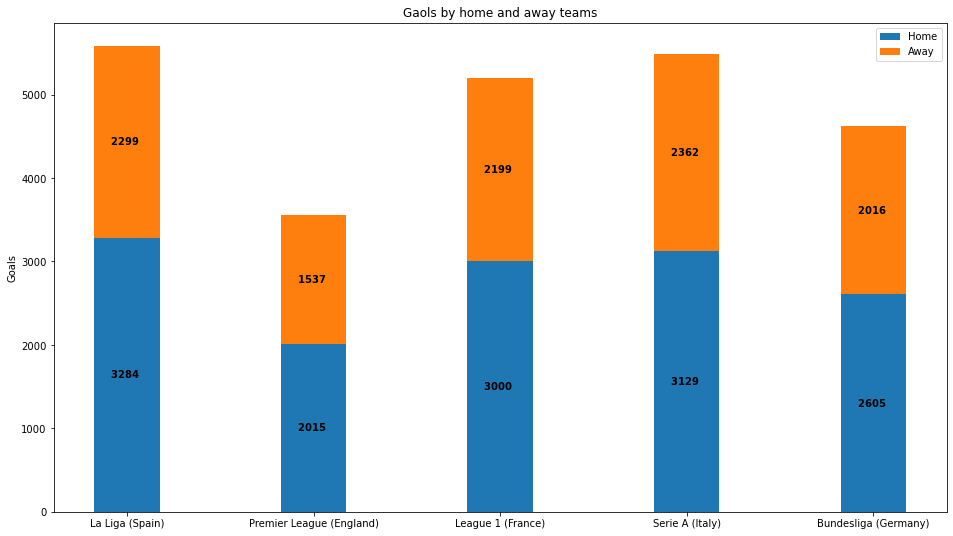

In [73]:
home_goals = [home_goals_laliga, home_goals_premier, home_goals_lig1, home_goals_seriea, home_goals_bundesliga]
away_goals = [away_goals_laliga, away_goals_premier, away_goals_lig1, away_goals_seriea, away_goals_bundesliga]
labels = ['La Liga (Spain)', 'Premier League (England)', 'League 1 (France)', 'Serie A (Italy)', 'Bundesliga (Germany)']
fig, ax = plt.subplots()
ax.bar(labels, home_goals, width = 0.35, label = 'Home')
ax.bar(labels, away_goals, width = 0.35, bottom = home_goals,   label = 'Away')

ax.set_ylabel('Goals')
ax.set_title('Gaols by home and away teams')
ax.legend()

#ax = .plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} '.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', fontweight = 'bold' )

plt.show()




In [74]:
home_goals

[3284, 2015, 3000, 3129, 2605]

In [75]:
away_goals

[2299, 1537, 2199, 2362, 2016]

# Red Card Comparison

## Second Yellow Card

In [76]:
second_yellow = data[data['event_type'] == 5]
second_yellow

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year,League
388985,jVWrmK00/,jVWrmK0085,85,75,Second yellow card to James Tomkins (West Ham ...,5,14.0,2,West Ham,Cardiff,james tomkins,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,england,2014-01-11,2014,Premier League
846283,rLFpDSQI/,rLFpDSQI106,106,93,Second yellow card to Nicolas Pallois (Bordeaux).,5,14.0,2,Bordeaux,Toulouse,nicolas pallois,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2016-08-20,2016,League 1
847330,jNjIXiE4/,jNjIXiE481,81,77,Second yellow card to Harry Arter (Bournemouth...,5,14.0,2,Bournemouth,West Ham,harry arter,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,england,2016-08-21,2016,Premier League
847946,Q7ZbHWmP/,Q7ZbHWmP112,112,91,Second yellow card to Slobodan Rajkovic (Paler...,5,14.0,1,Palermo,Sassuolo,slobodan rajkovic,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2016-08-21,2016,Serie A
848087,SGLQCjdt/,SGLQCjdt132,132,94,Second yellow card to Gabriel Paletta (Milan) ...,5,14.0,1,AC Milan,Torino,gabriel paletta,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2016-08-21,2016,Serie A
850069,MaYdE3Xp/,MaYdE3Xp112,112,87,Second yellow card to M'Baye Niang (Milan) for...,5,14.0,2,AC Milan,Napoli,mbaye niang,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2016-08-27,2016,Serie A
852768,vuVXJP9N/,vuVXJP9N46,46,42,Second yellow card to Carlos Carmona (Atalanta...,5,14.0,2,Atalanta,Sampdoria,carlos carmona,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2016-08-28,2016,Serie A
853367,K4c7wbOu/,K4c7wbOu73,73,92,Second yellow card to Javi Fuego (Espanyol) fo...,5,14.0,2,Espanyol,Real Sociedad,javi fuego,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,spain,2016-09-09,2016,La Liga
853707,6wJW55zj/,6wJW55zj31,31,34,Second yellow card to Billy Ketkeophomphone (A...,5,14.0,1,Angers,Dijon FCO,billy ketkeophomphone,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2016-09-10,2016,League 1
853727,6wJW55zj/,6wJW55zj51,51,50,Second yellow card to Jordan Marie (Dijon) for...,5,14.0,2,Dijon FCO,Angers,jordan marie,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2016-09-10,2016,League 1


In [77]:
red_card = data[data['event_type'] == 6]
red_card

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year,League
1297,WQGN5NXn/,WQGN5NXn110,110,83,Pascal Berenguer (Nancy) is shown the red card...,6,14.0,1,AS Nancy Lorraine,Lille,pascal berenguer,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2011-08-06,2011,League 1
5236,tl4D8Ggo/,tl4D8Ggo49,49,41,Abdoulaye MA©itA© (Dijon) is shown the red car...,6,14.0,1,Dijon FCO,Lorient,abdoulaye meite,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2011-08-20,2011,League 1
5708,fydAFnSc/,fydAFnSc74,74,66,Carlao (Sochaux) is shown the red card for a b...,6,14.0,2,Sochaux,AS Nancy Lorraine,carlao,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2011-08-21,2011,League 1
6378,0QSBhGQ1/,0QSBhGQ1100,100,82,YounA©s Belhanda (Montpellier) is shown the re...,6,14.0,2,Montpellier,Lyon,younes belhanda,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2011-08-27,2011,League 1
6685,CtEdUSdJ/,CtEdUSdJ62,62,68,Carlos MartA­nez (Real Sociedad) is shown the ...,6,14.0,2,Real Sociedad,Sporting Gijon,carlos martinez,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,spain,2011-08-27,2011,La Liga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936691,CtgqEACd/,CtgqEACd52,52,39,Jaroslav Drobny (SV Werder Bremen) is shown th...,6,14.0,1,Werder Bremen,Borussia Dortmund,jaroslav drobny,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2017-01-21,2017,Bundesliga
937510,MBzzyYJ9/,MBzzyYJ96,6,3,Lukas Hradecky (Eintracht Frankfurt) is shown ...,6,14.0,2,Eintracht Frankfurt,RB Leipzig,lukas hradecky,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2017-01-21,2017,Bundesliga
938736,YuBOxMOg/,YuBOxMOg54,54,43,Yann Bodiger (Toulouse) is shown the red card.,6,14.0,2,Toulouse,Bordeaux,yann bodiger,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,france,2017-01-21,2017,League 1
939003,8bTG0QD7/,8bTG0QD798,98,93,Joao Pedro (Cagliari) is shown the red card.,6,14.0,2,Cagliari,AS Roma,joao pedro,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22,2017,Serie A


### Comparing two types of red cards 
It is obvious that most of the red cards are caused by direct red cards, only 8 percent of the red cards are the result of second yellow card.

In [78]:
card_dict = {'Second Yellow Card' : len(second_yellow), 'Red Card' : len(red_card)}
card_dict

{'Second Yellow Card': 100, 'Red Card': 1152}

<BarContainer object of 2 artists>

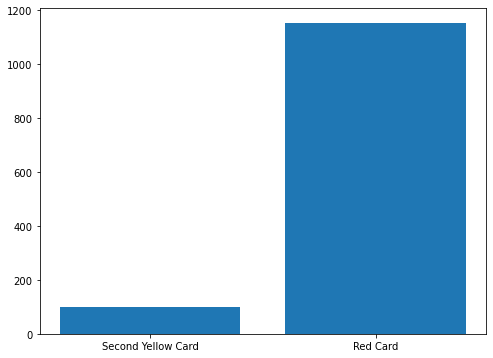

In [79]:
plt.rcParams['figure.figsize'] = 8, 6
plt.bar(list(card_dict.keys()), card_dict.values())

## Distribution of red cards by teams
Here we created a bar chart after we found the number of red cards that teams have gotten.

In [80]:
yellow = second_yellow.groupby('event_team').count()
yellow['teams'] = yellow.index
yellow2 = pd.DataFrame()
yellow2['frequency'] = yellow['id_odsp']
yellow2['teams'] = yellow['teams']
yellow2.reset_index(drop=True, inplace=True)
yellow2

,frequency,teams
0,3,AC Milan
1,1,Alaves
2,1,Angers
3,1,Atalanta
4,1,Athletic Bilbao
5,2,Atletico Madrid
6,3,Bastia
7,1,Bayer Leverkusen
8,1,Bologna
9,1,Bordeaux


In [81]:
red = red_card.groupby('event_team').count()
red['event_team'] = red.index
red2 = pd.DataFrame()
red2['teams'] = red['event_team']
red2['frequency'] = red['time']
red2.reset_index(drop=True, inplace=True)
red2

,teams,frequency
0,AC Ajaccio,12
1,AC Milan,18
2,AJ Auxerre,3
3,AS Monaco,8
4,AS Nancy Lorraine,7
5,AS Roma,17
6,Alaves,1
7,Almeria,3
8,Angers,8
9,Arsenal,8


In [82]:
total_red = red2['frequency'].add(yellow2['frequency'], fill_value=0)
total_red = pd.DataFrame(total_red)
total_red['event_team'] = red2['teams']
total_red = total_red.convert_dtypes()
total_red.reset_index(drop=True, inplace=True)
total_red

,frequency,event_team
0,15,AC Ajaccio
1,19,AC Milan
2,4,AJ Auxerre
3,9,AS Monaco
4,8,AS Nancy Lorraine
5,19,AS Roma
6,4,Alaves
7,4,Almeria
8,9,Angers
9,9,Arsenal


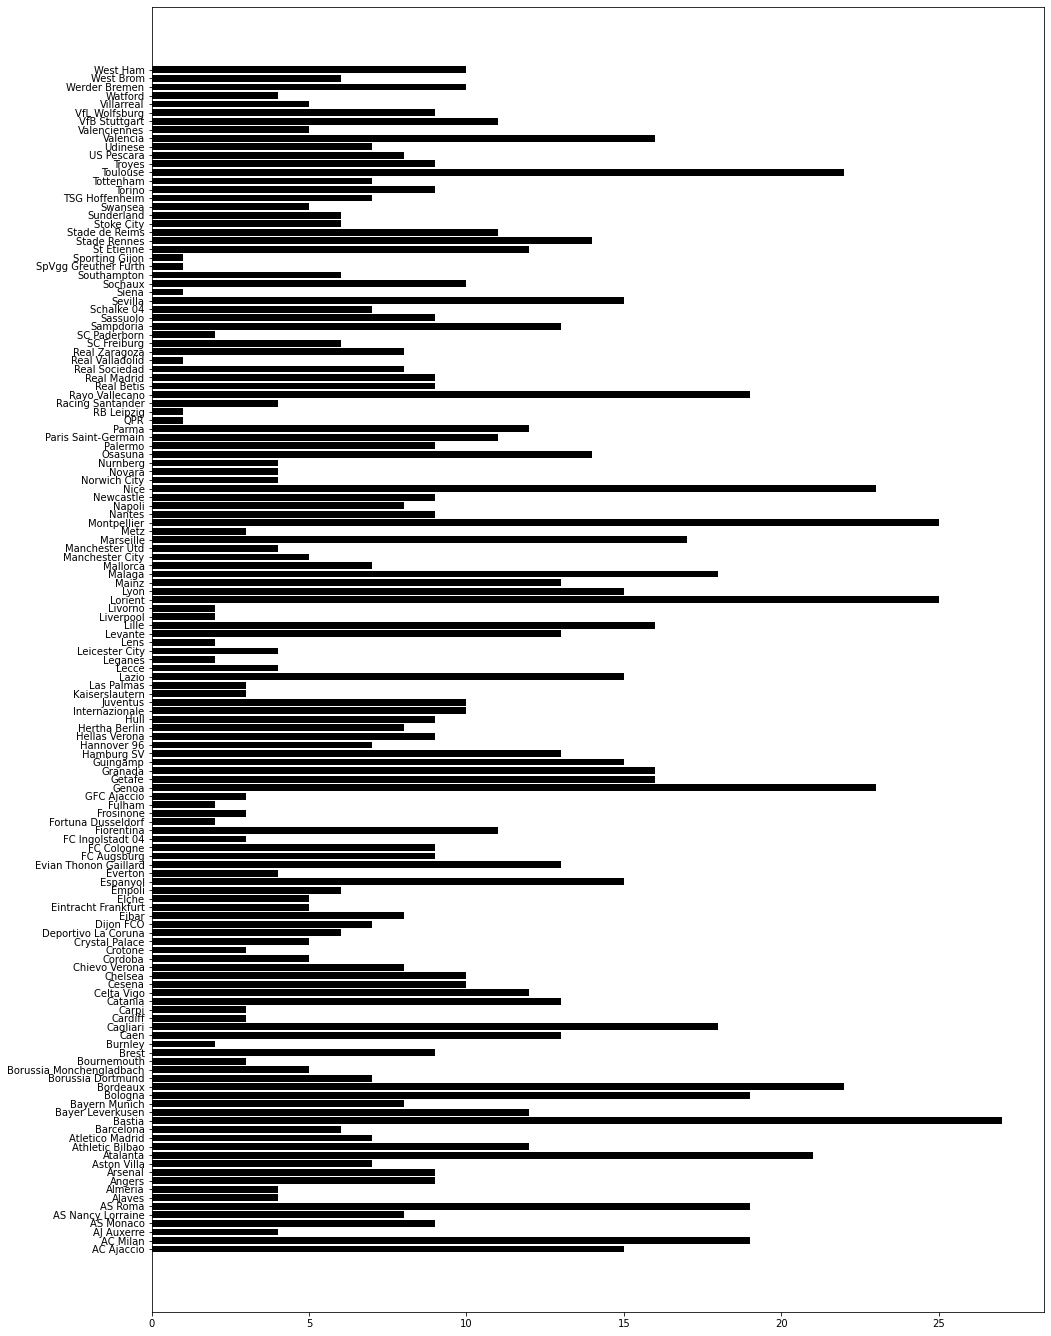

In [83]:
plt.rcParams['figure.figsize'] = 16, 24
plt.barh(list(total_red['event_team']), total_red['frequency'], color = 'black')
plt.show()

## Distriubiton of Red cards by Leagues and Years
Here we looked for in which league more red cards have been given and League 1 (France) is leading in front of Serie A (Italy) and La Liga (Spain). After that we investigated the yearly distribution.

In [84]:
red_card_country = red_card.groupby('country').count()
red_card_country['frequency'] = red_card_country['id_odsp']
red_card_country = red_card_country['frequency']
red_card_country = pd.DataFrame(red_card_country)
red_card_country['country'] = red_card_country.index
red_card_country.reset_index(drop=True, inplace=True)
red_card_country

,frequency,country
0,120,england
1,362,france
2,145,germany
3,278,italy
4,247,spain


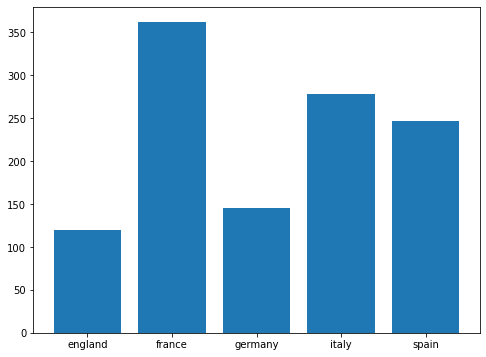

In [85]:
plt.rcParams['figure.figsize'] = 8, 6
plt.bar(list(red_card_country['country']), red_card_country['frequency'])
plt.show()

In [86]:
red_card_years = red_card.groupby('year').count()
red_card_years['frequency'] = red_card_years['id_odsp']
red_card_years = red_card_years['frequency']
red_card_years = pd.DataFrame(red_card_years)
red_card_years['year'] = red_card_years.index
red_card_years.reset_index(drop=True, inplace=True)
red_card_years

,frequency,year
0,91,2011
1,238,2012
2,182,2013
3,197,2014
4,239,2015
5,194,2016
6,11,2017


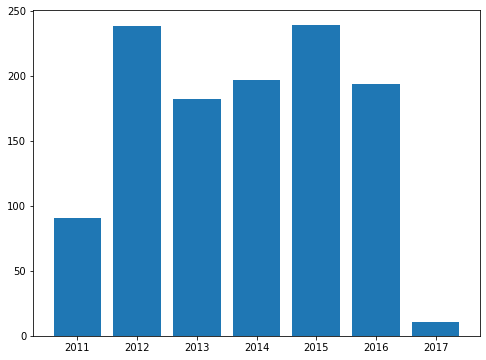

In [87]:
plt.rcParams['figure.figsize'] = 8, 6
plt.bar(list(red_card_years['year']), red_card_years['frequency'])
plt.show()

2017 is by far the least year here because of our data does not cover the whole 2017 year.


# Another Approach to Player

In [90]:
events = pd.read_csv('football-events/events.csv')
info = pd.read_csv('football-events/ginf.csv')

### Trimming

In [91]:
events['player'] = events['player'].astype(str).str.strip()
events['player2'] = events['player2'].astype(str).str.strip()

### Merging

In [92]:
#events.set_index(['id_odsp','id_event'], inplace=True)
events = events.merge(info[['id_odsp', 'country','date','season']], on='id_odsp', how='left')

### Adding Year

In [93]:
events.head(5)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2012
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,nan,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,nan,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2012


<h1>Data Filtering</h1>

In [94]:
def setDataSeason(data,season):
        if len(season) > 1 :
            data = data.loc[(season[0] <= data['season']) & (data['season'] <=season[1])]
            print("Date was chosen as " + str(season[0]) +" - "+ str(season[1]) + ".")
        elif len(season) == 1 :
            data = data.loc[data['season'] == season[0]]
            print("Date was chosen as " + str(season[0]) + ".")
        else :
            print("Date is invalid.")
                
        return data

In [95]:
def setDataCountry(data,country):
        if country in pd.unique(data['country']):
            data = data.loc[data['country']==country]
            print("Country(League) was chosen as " + country.upper() + ".")
        else :
            print("Country(League) is invalid.")
        return data

In [96]:
def setDataTeam(data,team):
        if team in pd.unique(data['event_team']):
            data = data.loc[(data['event_team']==team)] #|(data['opponent']==team)]
            print("Team was chosen as " + team.upper() + ".")
        else :
            print("Team is invalid.")
        return data

In [97]:
def filterData(data,season = None,country = None,team = None):
    if season is not None:
        data = setDataSeason(data,season)
    else:
        print('Season is not chosen.')
    
    if country is not None:
        data = setDataCountry(data,country)
    else:
        print('Country is not chosen.')
        
    if team is not None:
        data = setDataTeam(data,team)
    else:
        print('Team is not chosen.')
    
    return data

In [98]:
test1 = filterData(events,season=[2016],country='germany',team = 'Borussia Dortmund')
len(test1.index)

Date was chosen as 2016.
Country(League) was chosen as GERMANY.
Team was chosen as BORUSSIA DORTMUND.


1758

In [99]:
test2 = filterData(events,season=[2017],country='germany',team = 'Borussia Dortmund')
len(test2.index)

Date was chosen as 2017.
Country(League) was chosen as GERMANY.
Team was chosen as BORUSSIA DORTMUND.


979

We'd better be aware that the 2017 season data may distort our statistics.

### Taking a sample from the data


In [100]:
filteredData = filterData(events,season=[2014,2016],country='germany',team = 'Borussia Dortmund')
filteredData

Date was chosen as 2014 - 2016.
Country(League) was chosen as GERMANY.
Team was chosen as BORUSSIA DORTMUND.


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
313311,MLszqZiM/,MLszqZiM5,5,5,Attempt saved. Jakub Blaszczykowski (Borussia ...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,jakub blaszczykowski,marco reus,NaN,NaN,5.0,1.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
313312,MLszqZiM/,MLszqZiM6,6,5,"Corner, Borussia Dortmund. Conceded by Kevin ...",2,NaN,2,Borussia Dortmund,Eintracht Frankfurt,kevin trapp,kevin trapp,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2013-09-01,2014
313313,MLszqZiM/,MLszqZiM7,7,6,Attempt missed. Mats Hummels (Borussia Dortmun...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,mats hummels,nuri sahin,NaN,NaN,8.0,2.0,0,3.0,3.0,2,3.0,0,germany,2013-09-01,2014
313315,MLszqZiM/,MLszqZiM9,9,8,Henrikh Mkhitaryan (Borussia Dortmund) wins a ...,8,NaN,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,nan,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2013-09-01,2014
313316,MLszqZiM/,MLszqZiM10,10,9,Attempt missed. Marco Reus (Borussia Dortmund)...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marco reus,kevin grosskreutz,NaN,NaN,10.0,2.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837124,dM6jpOxL/,dM6jpOxL101,101,89,Attempt missed. Marcel Schmelzer (Borussia Dor...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marcel schmelzer,henrikh mkhitaryan,NaN,NaN,10.0,2.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016
837129,dM6jpOxL/,dM6jpOxL106,106,90,Attempt blocked. Marcel Schmelzer (Borussia Do...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marcel schmelzer,nuri sahin,NaN,NaN,2.0,3.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016
837130,dM6jpOxL/,dM6jpOxL107,107,90,Sokratis (Borussia Dortmund) wins a free kick ...,8,NaN,2,Borussia Dortmund,Eintracht Frankfurt,sokratis,nan,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2016-05-07,2016
837131,dM6jpOxL/,dM6jpOxL108,108,90,Marcel Schmelzer (Borussia Dortmund) wins a fr...,8,NaN,2,Borussia Dortmund,Eintracht Frankfurt,marcel schmelzer,nan,NaN,NaN,NaN,NaN,0,1.0,NaN,0,NaN,0,germany,2016-05-07,2016


# For 5 prominent european league, the following summary clearly shows that playing at away is more difficult than playing at home.

In [101]:
def SummaryAll(events):
    eventsHome = events[events.side == 1]
    eventsAway = events[events.side == 2]
    
    matches = pd.DataFrame( events.groupby('country')['id_odsp'].nunique() )
    matches.columns=['Matches Total']
    
    attemptsHome = eventsHome[eventsHome.event_type == 1]
    attemptsAway = eventsAway[eventsAway.event_type == 1]
    

    crossHome = pd.crosstab(attemptsHome['country'],attemptsHome['is_goal'])
    crossHome.columns=['Shots not Goal','Shots on Goal']
    crossHome['Total Shots'] = crossHome['Shots not Goal'] + crossHome['Shots on Goal']
    crossHome['Shots Per Match'] = round(crossHome['Total Shots'] / matches['Matches Total'],2)
    crossHome['Goals Per Match'] = round(crossHome['Shots on Goal'] / matches['Matches Total'],2)

    crossAway = pd.crosstab(attemptsAway['country'],attemptsAway['is_goal'])
    crossAway.columns=['Shots not Goal','Shots on Goal']
    crossAway['Total Shots'] = crossAway['Shots not Goal'] + crossAway['Shots on Goal']
    crossAway['Shots Per Match'] = round(crossAway['Total Shots'] / matches['Matches Total'],2)
    crossAway['Goals Per Match'] = round(crossAway['Shots on Goal'] / matches['Matches Total'],2)

    
    res = matches.join(crossHome).join(crossAway, lsuffix=' HOME', rsuffix=' AWAY')
    return res
    

In [102]:
SummaryAll(events)

,Matches Total,Shots not Goal HOME,Shots on Goal HOME,Total Shots HOME,Shots Per Match HOME,Goals Per Match HOME,Shots not Goal AWAY,Shots on Goal AWAY,Total Shots AWAY,Shots Per Match AWAY,Goals Per Match AWAY
country,,,,,,,,,,,
england,1299,16844,2015,18859,14.52,1.55,13516,1537,15053,11.59,1.18
france,2076,24417,3000,27417,13.21,1.45,19378,2199,21577,10.39,1.06
germany,1608,20373,2605,22978,14.29,1.62,16543,2016,18559,11.54,1.25
italy,2076,26945,3129,30074,14.49,1.51,22308,2362,24670,11.88,1.14
spain,2015,24573,3281,27854,13.82,1.63,19797,2297,22094,10.96,1.14


<h1> Shots

In [103]:
shots = filteredData[filteredData.event_type==1]
shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
313311,MLszqZiM/,MLszqZiM5,5,5,Attempt saved. Jakub Blaszczykowski (Borussia ...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,jakub blaszczykowski,marco reus,NaN,NaN,5.0,1.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
313313,MLszqZiM/,MLszqZiM7,7,6,Attempt missed. Mats Hummels (Borussia Dortmun...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,mats hummels,nuri sahin,NaN,NaN,8.0,2.0,0,3.0,3.0,2,3.0,0,germany,2013-09-01,2014
313316,MLszqZiM/,MLszqZiM10,10,9,Attempt missed. Marco Reus (Borussia Dortmund)...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marco reus,kevin grosskreutz,NaN,NaN,10.0,2.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
313317,MLszqZiM/,MLszqZiM11,11,10,"Goal! Eintracht Frankfurt 0, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,jakub blaszczykowski,NaN,NaN,4.0,1.0,1,3.0,2.0,4,1.0,0,germany,2013-09-01,2014
313326,MLszqZiM/,MLszqZiM20,20,20,Attempt saved. Robert Lewandowski (Borussia Do...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,robert lewandowski,marco reus,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0,germany,2013-09-01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837105,dM6jpOxL/,dM6jpOxL82,82,72,Attempt saved. Henrikh Mkhitaryan (Borussia Do...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,gonzalo castro,NaN,NaN,13.0,1.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016
837115,dM6jpOxL/,dM6jpOxL92,92,82,Attempt blocked. Henrikh Mkhitaryan (Borussia ...,1,NaN,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,nan,NaN,NaN,2.0,3.0,0,3.0,1.0,0,1.0,0,germany,2016-05-07,2016
837123,dM6jpOxL/,dM6jpOxL100,100,85,Attempt missed. Henrikh Mkhitaryan (Borussia D...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,marcel schmelzer,NaN,NaN,1.0,2.0,0,3.0,3.0,1,2.0,0,germany,2016-05-07,2016
837124,dM6jpOxL/,dM6jpOxL101,101,89,Attempt missed. Marcel Schmelzer (Borussia Dor...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marcel schmelzer,henrikh mkhitaryan,NaN,NaN,10.0,2.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016


In [104]:
crrs = pd.crosstab(shots['shot_place'],shots['shot_outcome'])

In [105]:
crrs.rename(columns={1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'}, inplace=True)
crrs.rename(index={1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'}, inplace=True)

In [106]:
crrs

shot_outcome,On Target,Off Target,Blocked,Hit the Bar
shot_place,,,,
Bit too high,0,54,0,0
Blocked,0,0,385,0
Bottom left corner,124,0,0,0
Bottom right corner,141,0,0,0
Centre of the goal,204,0,0,0
High and wide,0,89,0,0
Hits the bar,0,0,0,26
Misses to the left,0,188,0,0
Misses to the right,0,136,0,0


In [107]:
tmp = filteredData.loc[(filteredData['event_type']==1)]
data_shots = tmp.loc[(tmp['shot_place'].notna()) & (tmp['shot_outcome'].notna())]

data_shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
313311,MLszqZiM/,MLszqZiM5,5,5,Attempt saved. Jakub Blaszczykowski (Borussia ...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,jakub blaszczykowski,marco reus,NaN,NaN,5.0,1.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
313313,MLszqZiM/,MLszqZiM7,7,6,Attempt missed. Mats Hummels (Borussia Dortmun...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,mats hummels,nuri sahin,NaN,NaN,8.0,2.0,0,3.0,3.0,2,3.0,0,germany,2013-09-01,2014
313316,MLszqZiM/,MLszqZiM10,10,9,Attempt missed. Marco Reus (Borussia Dortmund)...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marco reus,kevin grosskreutz,NaN,NaN,10.0,2.0,0,3.0,1.0,1,1.0,0,germany,2013-09-01,2014
313317,MLszqZiM/,MLszqZiM11,11,10,"Goal! Eintracht Frankfurt 0, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,jakub blaszczykowski,NaN,NaN,4.0,1.0,1,3.0,2.0,4,1.0,0,germany,2013-09-01,2014
313326,MLszqZiM/,MLszqZiM20,20,20,Attempt saved. Robert Lewandowski (Borussia Do...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,robert lewandowski,marco reus,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0,germany,2013-09-01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837105,dM6jpOxL/,dM6jpOxL82,82,72,Attempt saved. Henrikh Mkhitaryan (Borussia Do...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,gonzalo castro,NaN,NaN,13.0,1.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016
837115,dM6jpOxL/,dM6jpOxL92,92,82,Attempt blocked. Henrikh Mkhitaryan (Borussia ...,1,NaN,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,nan,NaN,NaN,2.0,3.0,0,3.0,1.0,0,1.0,0,germany,2016-05-07,2016
837123,dM6jpOxL/,dM6jpOxL100,100,85,Attempt missed. Henrikh Mkhitaryan (Borussia D...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,marcel schmelzer,NaN,NaN,1.0,2.0,0,3.0,3.0,1,2.0,0,germany,2016-05-07,2016
837124,dM6jpOxL/,dM6jpOxL101,101,89,Attempt missed. Marcel Schmelzer (Borussia Dor...,1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,marcel schmelzer,henrikh mkhitaryan,NaN,NaN,10.0,2.0,0,15.0,2.0,1,1.0,0,germany,2016-05-07,2016


In [108]:
data_shots[data_shots.is_goal == 1]

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
313317,MLszqZiM/,MLszqZiM11,11,10,"Goal! Eintracht Frankfurt 0, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,jakub blaszczykowski,NaN,NaN,4.0,1.0,1,3.0,2.0,4,1.0,0,germany,2013-09-01,2014
313360,MLszqZiM/,MLszqZiM54,54,56,"Goal! Eintracht Frankfurt 1, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,kevin grosskreutz,NaN,NaN,3.0,1.0,1,15.0,2.0,1,1.0,0,germany,2013-09-01,2014
314877,2ZNAciJS/,2ZNAciJS19,19,19,"Goal! Borussia Dortmund 1, Hamburger SV 0. Pi...",1,12.0,1,Borussia Dortmund,Hamburg SV,pierreemerick aubameyang,marcel schmelzer,NaN,NaN,4.0,1.0,1,9.0,2.0,1,2.0,0,germany,2013-09-14,2014
314882,2ZNAciJS/,2ZNAciJS24,24,22,"Goal! Borussia Dortmund 2, Hamburger SV 0. He...",1,12.0,1,Borussia Dortmund,Hamburg SV,henrikh mkhitaryan,robert lewandowski,NaN,NaN,3.0,1.0,1,3.0,1.0,1,1.0,0,germany,2013-09-14,2014
314956,2ZNAciJS/,2ZNAciJS98,98,65,"Goal! Borussia Dortmund 3, Hamburger SV 2. Pi...",1,12.0,1,Borussia Dortmund,Hamburg SV,pierreemerick aubameyang,henrikh mkhitaryan,NaN,NaN,3.0,1.0,1,11.0,1.0,1,1.0,0,germany,2013-09-14,2014
314968,2ZNAciJS/,2ZNAciJS110,110,73,"Goal! Borussia Dortmund 4, Hamburger SV 2. Ro...",1,12.0,1,Borussia Dortmund,Hamburg SV,robert lewandowski,pierreemerick aubameyang,NaN,NaN,4.0,1.0,1,3.0,1.0,1,1.0,1,germany,2013-09-14,2014
314969,2ZNAciJS/,2ZNAciJS111,111,74,"Goal! Borussia Dortmund 5, Hamburger SV 2. Ma...",1,NaN,1,Borussia Dortmund,Hamburg SV,marco reus,nan,NaN,NaN,4.0,1.0,1,3.0,1.0,0,1.0,0,germany,2013-09-14,2014
314977,2ZNAciJS/,2ZNAciJS119,119,81,"Goal! Borussia Dortmund 6, Hamburger SV 2. Ro...",1,12.0,1,Borussia Dortmund,Hamburg SV,robert lewandowski,nuri sahin,NaN,NaN,4.0,1.0,1,3.0,3.0,1,1.0,0,germany,2013-09-14,2014
320442,SbOWX6fr/,SbOWX6fr25,25,37,"Goal! 1. FC Nurnberg 0, Borussia Dortmund 1. ...",1,NaN,2,Borussia Dortmund,Nurnberg,marcel schmelzer,nan,NaN,NaN,13.0,1.0,1,19.0,2.0,0,4.0,0,germany,2013-09-21,2014
327761,tMn0ZJVn/,tMn0ZJVn44,44,45,"Goal! Borussia Dortmund 2, SC Freiburg 0. Mar...",1,NaN,1,Borussia Dortmund,SC Freiburg,marco reus,nan,NaN,NaN,3.0,1.0,1,14.0,1.0,0,2.0,0,germany,2013-09-28,2014


In [109]:
collist = ['shot_place','shot_outcome']
data_shots[collist]

,shot_place,shot_outcome
313311,5.0,1.0
313313,8.0,2.0
313316,10.0,2.0
313317,4.0,1.0
313326,5.0,1.0
...,...,...
837105,13.0,1.0
837115,2.0,3.0
837123,1.0,2.0
837124,10.0,2.0


In [110]:
def playersDataFrame(data,colvalue):
    
    #data = data.loc[data['GameType']==colvalue]
    
    collist = ['player','player2']
    
    arrayplayers = []
    
    for x in collist:
        dfPlayer = data.groupby(x).size()
        arrayplayers.extend(dfPlayer.index.array)
    
    datares = pd.DataFrame(index=arrayplayers)
    

    
    for x in collist:
        tmp = data.groupby(x).size()
        dfPlayer = pd.DataFrame(tmp)
        dfPlayer = dfPlayer.rename(columns = {0:x})
        datares[x] = dfPlayer[x]
        
    
    datares = datares.rename_axis('Player')
    datares.columns = ['Shoots','Assists']
    return datares

In [111]:
df_shoots_assists = playersDataFrame(shots, []).fillna(0)
df_shoots_assists


,Shoots,Assists
Player,,
adnan januzaj,4.0,7.0
adrian ramos,53.0,29.0
christian pulisic,8.0,7.0
christoph kramer,1.0,0.0
ciro immobile,42.0,8.0
erik durm,32.0,27.0
felipe,1.0,0.0
georg niedermeier,1.0,0.0
gonzalo castro,17.0,28.0


In [112]:
def playersGoalDataFrame(data,colvalue):
    
    #data = data.loc[data['GameType']==colvalue]
    
    collist = ['player']
    
    data = data.loc[data['is_goal']==1]
    
    arrayplayers = []
    
    for x in collist:
        dfPlayer = data.groupby(x).size()
        arrayplayers.extend(dfPlayer.index.array)
    
    datares = pd.DataFrame(index=arrayplayers)
    
    for x in collist:
        tmp = data.groupby(x).size()
        dfPlayer = pd.DataFrame(tmp)
        dfPlayer = dfPlayer.rename(columns = {0:x})
        datares[x] = dfPlayer[x]
    
    datares = datares.rename_axis('Player')
    datares.columns = ['Goal']
    return datares

In [113]:
df_goals = playersGoalDataFrame(shots, [])
df_goals

,Goal
Player,
adrian ramos,11
christian pulisic,2
christoph kramer,1
ciro immobile,3
erik durm,2
felipe,1
georg niedermeier,1
gonzalo castro,2
henrikh mkhitaryan,23


In [114]:
crosstb_shotsandgoals = pd.crosstab(shots['player'],shots['is_goal'])
a = pd.DataFrame(crosstb_shotsandgoals)
a.columns=['Shots not Goal','Shots on Goal']
a

,Shots not Goal,Shots on Goal
player,,
adnan januzaj,4,0
adrian ramos,42,11
christian pulisic,6,2
christoph kramer,0,1
ciro immobile,39,3
erik durm,30,2
felipe,0,1
georg niedermeier,0,1
gonzalo castro,15,2


In [115]:
crosstb_assistsandgoals = pd.crosstab(shots['player2'],shots['is_goal'])
b = pd.DataFrame(crosstb_assistsandgoals)
b.columns=['Assists not Goal','Assists on Goal']
b

,Assists not Goal,Assists on Goal
player2,,
adnan januzaj,5,2
adrian ramos,23,6
christian pulisic,7,0
ciro immobile,7,1
erik durm,25,2
felix passlack,1,0
gonzalo castro,21,7
henrikh mkhitaryan,141,29
ilkay gundogan,46,6


In [116]:
a.loc['marco reus']
a

,Shots not Goal,Shots on Goal
player,,
adnan januzaj,4,0
adrian ramos,42,11
christian pulisic,6,2
christoph kramer,0,1
ciro immobile,39,3
erik durm,30,2
felipe,0,1
georg niedermeier,0,1
gonzalo castro,15,2


In [117]:
b.loc['ilkay gundogan']
b

,Assists not Goal,Assists on Goal
player2,,
adnan januzaj,5,2
adrian ramos,23,6
christian pulisic,7,0
ciro immobile,7,1
erik durm,25,2
felix passlack,1,0
gonzalo castro,21,7
henrikh mkhitaryan,141,29
ilkay gundogan,46,6


In [118]:
tmp = b
tmp = tmp.join(a)
tmp

,Assists not Goal,Assists on Goal,Shots not Goal,Shots on Goal
player2,,,,
adnan januzaj,5,2,4.0,0.0
adrian ramos,23,6,42.0,11.0
christian pulisic,7,0,6.0,2.0
ciro immobile,7,1,39.0,3.0
erik durm,25,2,30.0,2.0
felix passlack,1,0,NaN,NaN
gonzalo castro,21,7,15.0,2.0
henrikh mkhitaryan,141,29,184.0,23.0
ilkay gundogan,46,6,82.0,4.0


In [119]:
crosstb_shotsandgoals = pd.crosstab(filteredData['player'],filteredData['is_goal'])
a = pd.DataFrame(crosstb_shotsandgoals)
a.columns=['Shots not Goal','Shots on Goal']
a

,Shots not Goal,Shots on Goal
player,,
adnan januzaj,15,0
adrian ramos,130,11
albin ekdal,2,0
alejandro galvez,2,0
aleksandar ignjovski,2,0
alexander madlung,1,0
alexander manninger,2,0
alvaro dominguez,1,0
anderson,3,0


In [120]:
b = playersDataFrame(filteredData, [])
b

,Shoots,Assists
Player,,
adnan januzaj,15.0,7.0
adrian ramos,141.0,33.0
albin ekdal,2.0,2.0
alejandro galvez,2.0,2.0
aleksandar ignjovski,2.0,2.0
...,...,...
yann sommer,1.0,1.0
yannick gerhardt,1.0,1.0
yunus malli,1.0,1.0


In [121]:
aaa = filteredData.loc[filteredData['is_goal']==1]
aaa

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
313317,MLszqZiM/,MLszqZiM11,11,10,"Goal! Eintracht Frankfurt 0, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,jakub blaszczykowski,NaN,NaN,4.0,1.0,1,3.0,2.0,4,1.0,0,germany,2013-09-01,2014
313360,MLszqZiM/,MLszqZiM54,54,56,"Goal! Eintracht Frankfurt 1, Borussia Dortmun...",1,12.0,2,Borussia Dortmund,Eintracht Frankfurt,henrikh mkhitaryan,kevin grosskreutz,NaN,NaN,3.0,1.0,1,15.0,2.0,1,1.0,0,germany,2013-09-01,2014
314877,2ZNAciJS/,2ZNAciJS19,19,19,"Goal! Borussia Dortmund 1, Hamburger SV 0. Pi...",1,12.0,1,Borussia Dortmund,Hamburg SV,pierreemerick aubameyang,marcel schmelzer,NaN,NaN,4.0,1.0,1,9.0,2.0,1,2.0,0,germany,2013-09-14,2014
314882,2ZNAciJS/,2ZNAciJS24,24,22,"Goal! Borussia Dortmund 2, Hamburger SV 0. He...",1,12.0,1,Borussia Dortmund,Hamburg SV,henrikh mkhitaryan,robert lewandowski,NaN,NaN,3.0,1.0,1,3.0,1.0,1,1.0,0,germany,2013-09-14,2014
314956,2ZNAciJS/,2ZNAciJS98,98,65,"Goal! Borussia Dortmund 3, Hamburger SV 2. Pi...",1,12.0,1,Borussia Dortmund,Hamburg SV,pierreemerick aubameyang,henrikh mkhitaryan,NaN,NaN,3.0,1.0,1,11.0,1.0,1,1.0,0,germany,2013-09-14,2014
314968,2ZNAciJS/,2ZNAciJS110,110,73,"Goal! Borussia Dortmund 4, Hamburger SV 2. Ro...",1,12.0,1,Borussia Dortmund,Hamburg SV,robert lewandowski,pierreemerick aubameyang,NaN,NaN,4.0,1.0,1,3.0,1.0,1,1.0,1,germany,2013-09-14,2014
314969,2ZNAciJS/,2ZNAciJS111,111,74,"Goal! Borussia Dortmund 5, Hamburger SV 2. Ma...",1,NaN,1,Borussia Dortmund,Hamburg SV,marco reus,nan,NaN,NaN,4.0,1.0,1,3.0,1.0,0,1.0,0,germany,2013-09-14,2014
314977,2ZNAciJS/,2ZNAciJS119,119,81,"Goal! Borussia Dortmund 6, Hamburger SV 2. Ro...",1,12.0,1,Borussia Dortmund,Hamburg SV,robert lewandowski,nuri sahin,NaN,NaN,4.0,1.0,1,3.0,3.0,1,1.0,0,germany,2013-09-14,2014
320442,SbOWX6fr/,SbOWX6fr25,25,37,"Goal! 1. FC Nurnberg 0, Borussia Dortmund 1. ...",1,NaN,2,Borussia Dortmund,Nurnberg,marcel schmelzer,nan,NaN,NaN,13.0,1.0,1,19.0,2.0,0,4.0,0,germany,2013-09-21,2014
327750,tMn0ZJVn/,tMn0ZJVn33,33,35,"Goal! Borussia Dortmund 1, SC Freiburg 0. Mar...",1,NaN,1,Borussia Dortmund,SC Freiburg,marco reus,nan,NaN,NaN,NaN,1.0,1,3.0,2.0,0,1.0,0,germany,2013-09-28,2014


In [122]:
from collections import Counter,OrderedDict

In [123]:
edges = Counter([(x,y) for x,y in zip(aaa['player2'],aaa['player'])])
nn = edges.most_common(5)

In [124]:
res = []


aab = dict(nn)
aab
for x,y in nn:
    print(x)
    if x[0] == 'nan':
        aab[(x[1],x[1])] = y
        del aab[x]

aab

('nan', 'marco reus')
('nan', 'pierreemerick aubameyang')
('marco reus', 'henrikh mkhitaryan')
('henrikh mkhitaryan', 'pierreemerick aubameyang')
('nan', 'robert lewandowski')


{('marco reus', 'henrikh mkhitaryan'): 6,
 ('henrikh mkhitaryan', 'pierreemerick aubameyang'): 5,
 ('marco reus', 'marco reus'): 13,
 ('pierreemerick aubameyang', 'pierreemerick aubameyang'): 9,
 ('robert lewandowski', 'robert lewandowski'): 5}

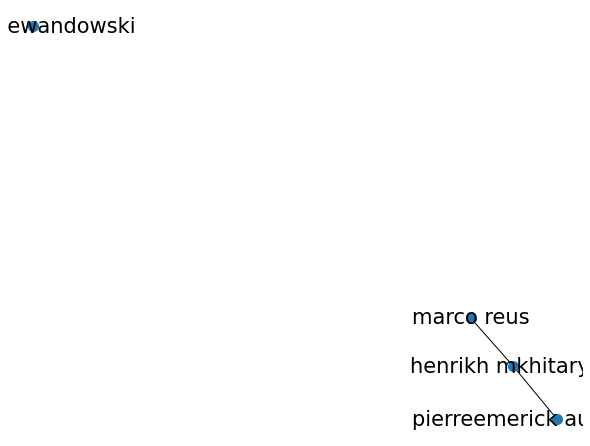

In [125]:
import networkx as nx

G = nx.Graph()

[G.add_edge(x[0],x[1], weight = aab[x]) for x in aab ]




#plt.rcParams["figure.figsize"] = (15,10)
nx.draw(G,with_labels=True, node_size=100,font_size=21)

In [126]:
filteredData = filterData(events)#year=[2014,2016],country='germany')
filteredData

Season is not chosen.
Country is not chosen.
Team is not chosen.


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,season
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2012
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,nan,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2012
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,nan,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,nan,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,italy,2017-01-22,2017
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,nan,nan,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,italy,2017-01-22,2017
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0,italy,2017-01-22,2017
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,nan,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0,italy,2017-01-22,2017


In [127]:
attempts = filteredData[filteredData.event_type==1]
cross = pd.crosstab(attempts['location'],attempts['is_goal'])
cross.index = cross.index.astype(int)
cross.rename(index={1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', \
                      4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', \
                      7:'Difficult angle on the left', 8:'Difficult angle on the right', \
                      9:'Left side of the box', 10:'Left side of the six yard box', \
                      11:'Right side of the box', 12:'Right side of the six yard box', \
                      13:'Very close range', 14:'Penalty spot', 15:'Outside the box', \
                      16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards',\
                      19:'Not recorded'} , inplace=True)
cross.rename(columns={0: 'Shots Not Goal', 1: 'Shots Goal'}, inplace=True)

# We clear Not Recorded data
cross = cross.drop('Not recorded')
cross['percentage'] = cross['Shots Goal']/(cross['Shots Not Goal']+cross['Shots Goal'])
cross

is_goal,Shots Not Goal,Shots Goal,percentage
location,,,
Centre of the box,58893,10713,0.153909
Difficult angle and long range,1474,43,0.028345
Difficult angle on the left,2362,201,0.078424
Difficult angle on the right,2271,187,0.076078
Left side of the box,17799,1234,0.064835
Left side of the six yard box,2781,711,0.203608
Right side of the box,17168,1273,0.069031
Right side of the six yard box,2724,702,0.204904
Very close range,3324,3337,0.500976


In [128]:
pd.unique(filteredData['player'])

array(['mladen petric', 'dennis diekmeier', 'heiko westermann', ...,
       'alhassan wakaso', 'filippo melegoni', 'alessandro bastoni'],
      dtype=object)

In [129]:
playerData = filteredData[filteredData.player=='robert lewandowski']


attemptsPlayer = playerData[playerData.event_type==1]
crossPlayer = pd.crosstab(attemptsPlayer['location'],attemptsPlayer['is_goal'])
crossPlayer.index = crossPlayer.index.astype(int)
crossPlayer.rename(index={1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', \
                      4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', \
                      7:'Difficult angle on the left', 8:'Difficult angle on the right', \
                      9:'Left side of the box', 10:'Left side of the six yard box', \
                      11:'Right side of the box', 12:'Right side of the six yard box', \
                      13:'Very close range', 14:'Penalty spot', 15:'Outside the box', \
                      16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards',\
                      19:'Not recorded'} , inplace=True)
crossPlayer.rename(columns={0: 'Shots Not Goal', 1: 'Shots Goal'}, inplace=True)

# We clear Not Recorded data
try :
    crossPlayer = crossPlayer.drop('Not recorded')
except : 
    print('Not recorded is not in the DF.')

crossPlayer['percentage'] = crossPlayer['Shots Goal']/(crossPlayer['Shots Not Goal']+crossPlayer['Shots Goal'])
crossPlayer['xq'] = (crossPlayer['Shots Not Goal'] + crossPlayer['Shots Goal'])*cross['percentage']
print(crossPlayer['xq'].sum())
crossPlayer

90.47025714359555


is_goal,Shots Not Goal,Shots Goal,percentage,xq
location,,,,
Centre of the box,284,70,0.197740,54.483838
Difficult angle on the left,10,2,0.166667,0.941085
Difficult angle on the right,7,0,0.000000,0.532547
Left side of the box,38,5,0.116279,2.787895
Left side of the six yard box,13,5,0.277778,3.664948
Right side of the box,37,3,0.075000,2.761239
Right side of the six yard box,12,1,0.076923,2.663748
Very close range,4,20,0.833333,12.023420
Penalty spot,1,9,0.900000,7.661787


In [130]:
{1:'Attacking half',
2:'Defensive half',
3:'Centre of the box',
4:'Left wing',
5:'Right wing',
6:'Difficult angle and long range',
7:'Difficult angle on the left',
8:'Difficult angle on the right',
9:'Left side of the box',
10:'Left side of the six yard box',
11:'Right side of the box',
12:'Right side of the six yard box',
13:'Very close range',
14:'Penalty spot',
15:'Outside the box',
16:'Long range',
17:'More than 35 yards',
18:'More than 40 yards',
19:'Not recorded'} 

{1: 'Attacking half',
 2: 'Defensive half',
 3: 'Centre of the box',
 4: 'Left wing',
 5: 'Right wing',
 6: 'Difficult angle and long range',
 7: 'Difficult angle on the left',
 8: 'Difficult angle on the right',
 9: 'Left side of the box',
 10: 'Left side of the six yard box',
 11: 'Right side of the box',
 12: 'Right side of the six yard box',
 13: 'Very close range',
 14: 'Penalty spot',
 15: 'Outside the box',
 16: 'Long range',
 17: 'More than 35 yards',
 18: 'More than 40 yards',
 19: 'Not recorded'}

In [131]:
crossPlayer['xq'] = (crossPlayer['Shots Not Goal'] + crossPlayer['Shots Goal'])*cross['percentage']
crossPlayer

is_goal,Shots Not Goal,Shots Goal,percentage,xq
location,,,,
Centre of the box,284,70,0.197740,54.483838
Difficult angle on the left,10,2,0.166667,0.941085
Difficult angle on the right,7,0,0.000000,0.532547
Left side of the box,38,5,0.116279,2.787895
Left side of the six yard box,13,5,0.277778,3.664948
Right side of the box,37,3,0.075000,2.761239
Right side of the six yard box,12,1,0.076923,2.663748
Very close range,4,20,0.833333,12.023420
Penalty spot,1,9,0.900000,7.661787


In [132]:
crossPlayer['Shots Not Goal'] + crossPlayer['Shots Goal']

location
Centre of the box                 354
Difficult angle on the left        12
Difficult angle on the right        7
Left side of the box               43
Left side of the six yard box      18
Right side of the box              40
Right side of the six yard box     13
Very close range                   24
Penalty spot                       10
Outside the box                   106
Long range                          3
More than 35 yards                  1
dtype: int64

In [133]:
cross['percentage']

location
Centre of the box                 0.153909
Difficult angle and long range    0.028345
Difficult angle on the left       0.078424
Difficult angle on the right      0.076078
Left side of the box              0.064835
Left side of the six yard box     0.203608
Right side of the box             0.069031
Right side of the six yard box    0.204904
Very close range                  0.500976
Penalty spot                      0.766179
Outside the box                   0.027277
Long range                        0.015570
More than 35 yards                0.011628
More than 40 yards                0.015625
Name: percentage, dtype: float64

In [134]:
(crossPlayer['Shots Not Goal'] + crossPlayer['Shots Goal'])*cross['percentage']

location
Centre of the box                 54.483838
Difficult angle and long range          NaN
Difficult angle on the left        0.941085
Difficult angle on the right       0.532547
Left side of the box               2.787895
Left side of the six yard box      3.664948
Long range                         0.046710
More than 35 yards                 0.011628
More than 40 yards                      NaN
Outside the box                    2.891413
Penalty spot                       7.661787
Right side of the box              2.761239
Right side of the six yard box     2.663748
Very close range                  12.023420
dtype: float64